In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from data_utils import reconstruct_signal_cosine
from scipy.fftpack import dct

In [4]:
data_path = "data/"
collection = "ONeillsJigs"

In [5]:
# load the dataframe
df = pd.read_pickle(f"{data_path}{collection}_parsed.pkl")

In [6]:
numtunes = df.shape[0]
Fs = 6.0 # samples per quaver
params = {'legend.fontsize': 'x-large',
      'figure.figsize': (10, 5),
     'axes.labelsize': 'x-large',
     'axes.titlesize':'x-large',
     'xtick.labelsize':'x-large',
     'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

idx_tunes = [15, 357]
for idx_tune in idx_tunes:
    print(df.title[idx_tune])

When sick is it tea you want?
Go to the Devil and shake yourself


In [3]:
def alpha(k, N):
    if k == 0:
        return 1 / np.sqrt(N)
    else:
        return np.sqrt(2/N)
    
def cosine(n, k, N):
    return alpha(k, N) * np.cos(np.pi * (2*n + 1) * k / (2*N))

def dct_matrix(N):
    """Discrete Cosine Transform NxN matrix where every column is a
    discrete cosine function. Columns are normalized, so the output
    is an orthogonal matrix."""
    ns = np.arange(N)
    return np.array([cosine(ns, k, N) for k in ns]).T

Tune n°: 16 
Title: When sick is it tea you want?


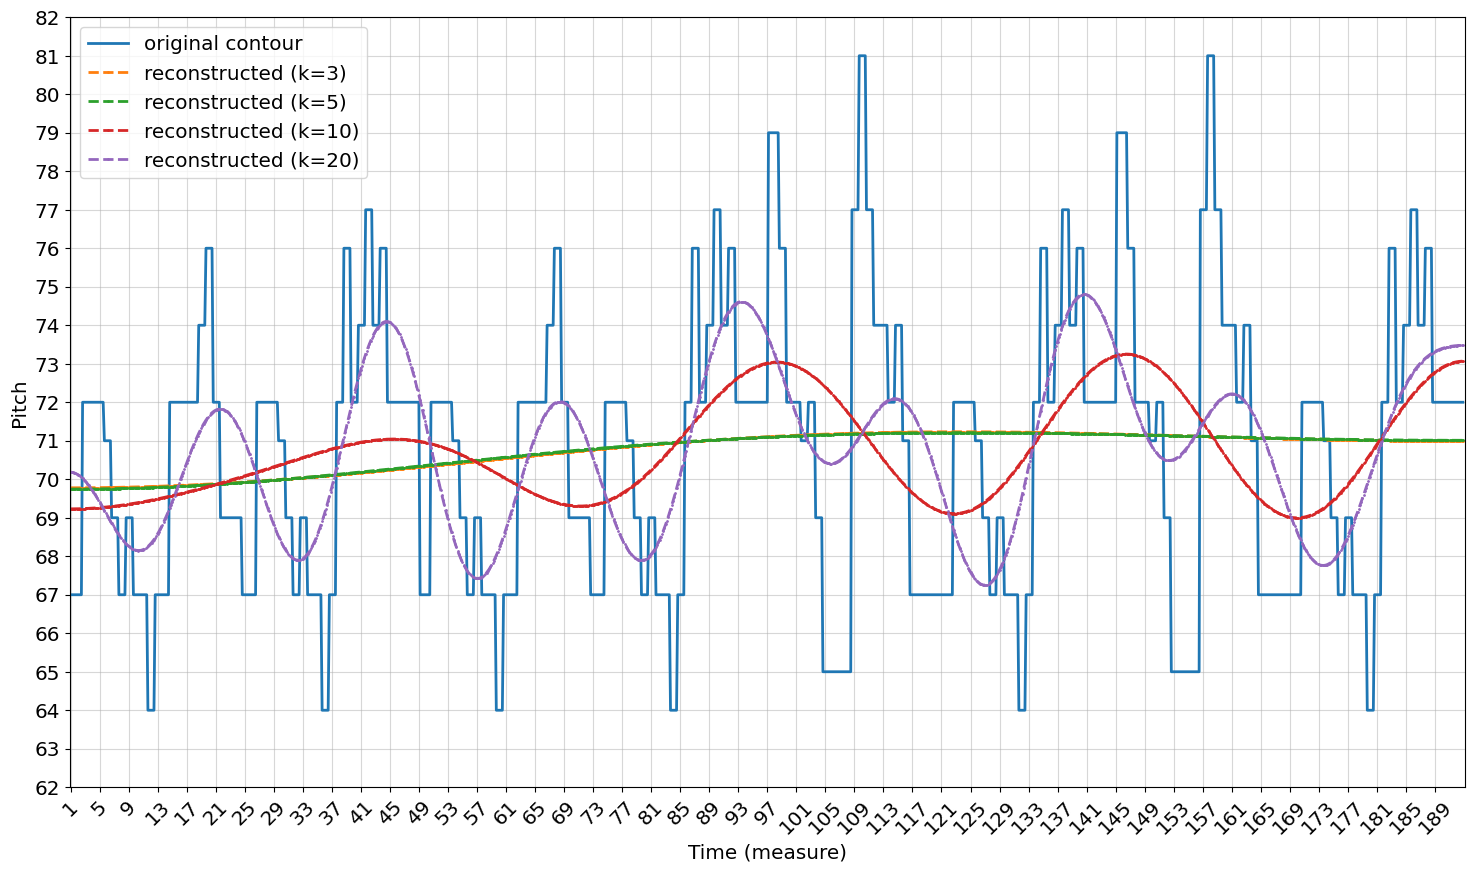

Tune n°: 358 
Title: Go to the Devil and shake yourself


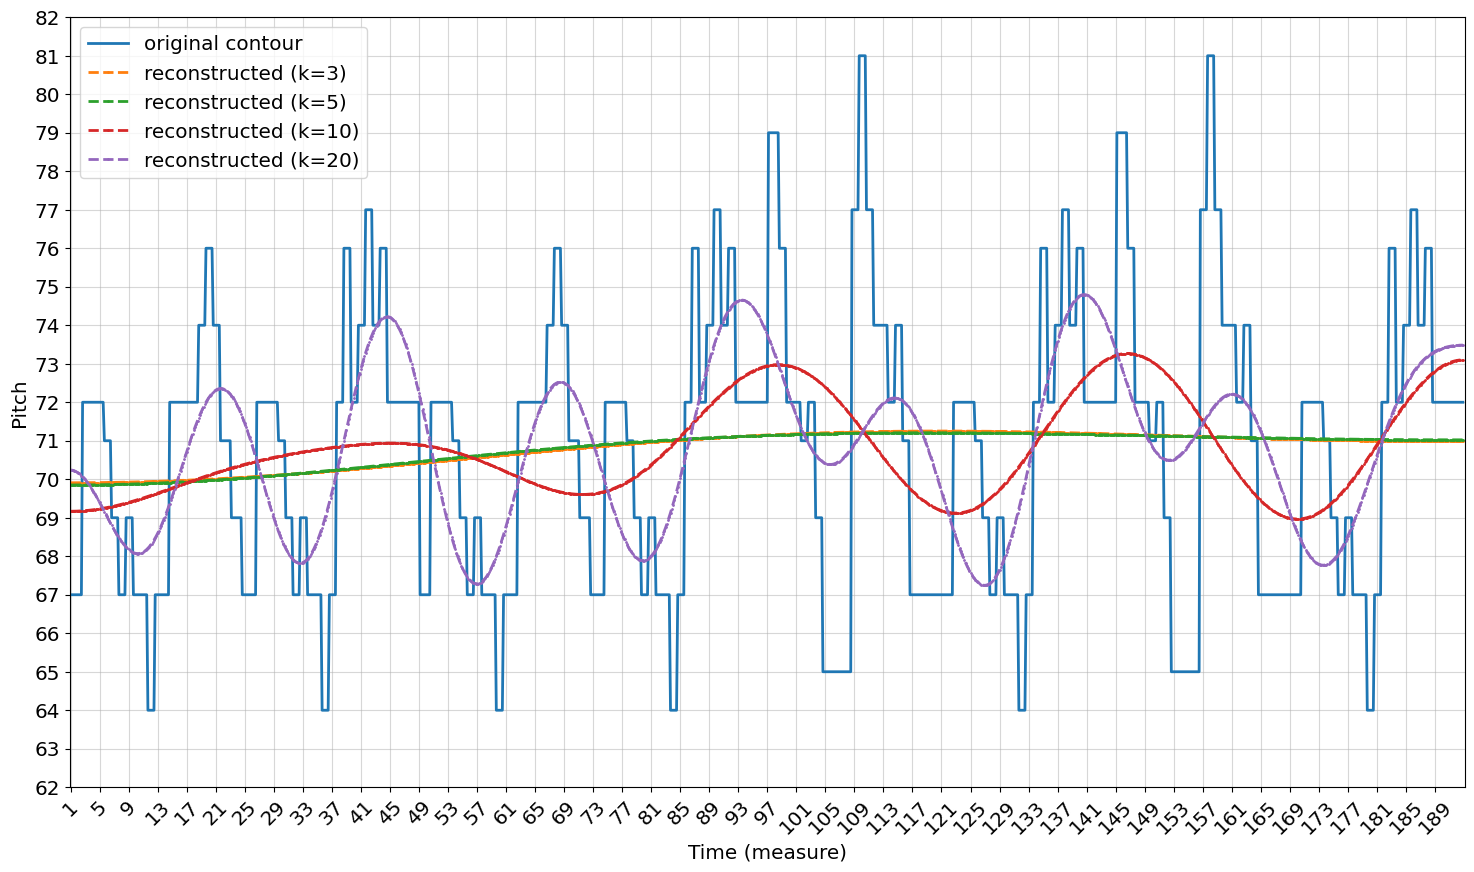

In [7]:
resolutions = [3, 5, 10, 20]
for idx_tune in idx_tunes:
    TimePitchTune = df.TimePitchTune[idx_tune]

    print("Tune n°:", idx_tune+1, "\nTitle:", df.title[idx_tune])
    tt = np.arange(0, len(TimePitchTune))

    fig, ax = plt.subplots(figsize=(18,10))
    plt.plot(1+tt/6,TimePitchTune, '-', lw=2, ms=2, label='original contour')
    cs = dct(TimePitchTune, norm='ortho')

    copy_cs = cs.copy()
    # plot the reconstructed signals for different values of k
    for k in resolutions:
        copy_cs[k:] = 0
        reconstructed = reconstruct_signal_cosine(copy_cs)
        ax.plot(1+tt/6, reconstructed, '.--', lw=2, ms=2, label='reconstructed (k={})'.format(k))
        copy_cs = cs.copy()

    plt.xticks(np.arange(1,len(TimePitchTune)/Fs+1,4),rotation=45)
    
    plt.xlabel("Time (measure)")
    plt.ylabel("Pitch")
    plt.xlim((0.9,len(TimePitchTune)/Fs+1.1))
    
    plt.yticks(np.arange(62,83,1))
    # add a grid
    plt.grid(alpha=.5)
    # add legend and show plot
    ax.legend()
    plt.show()

Tune n°: 16 
Parts: 4 
Title: When sick is it tea you want?


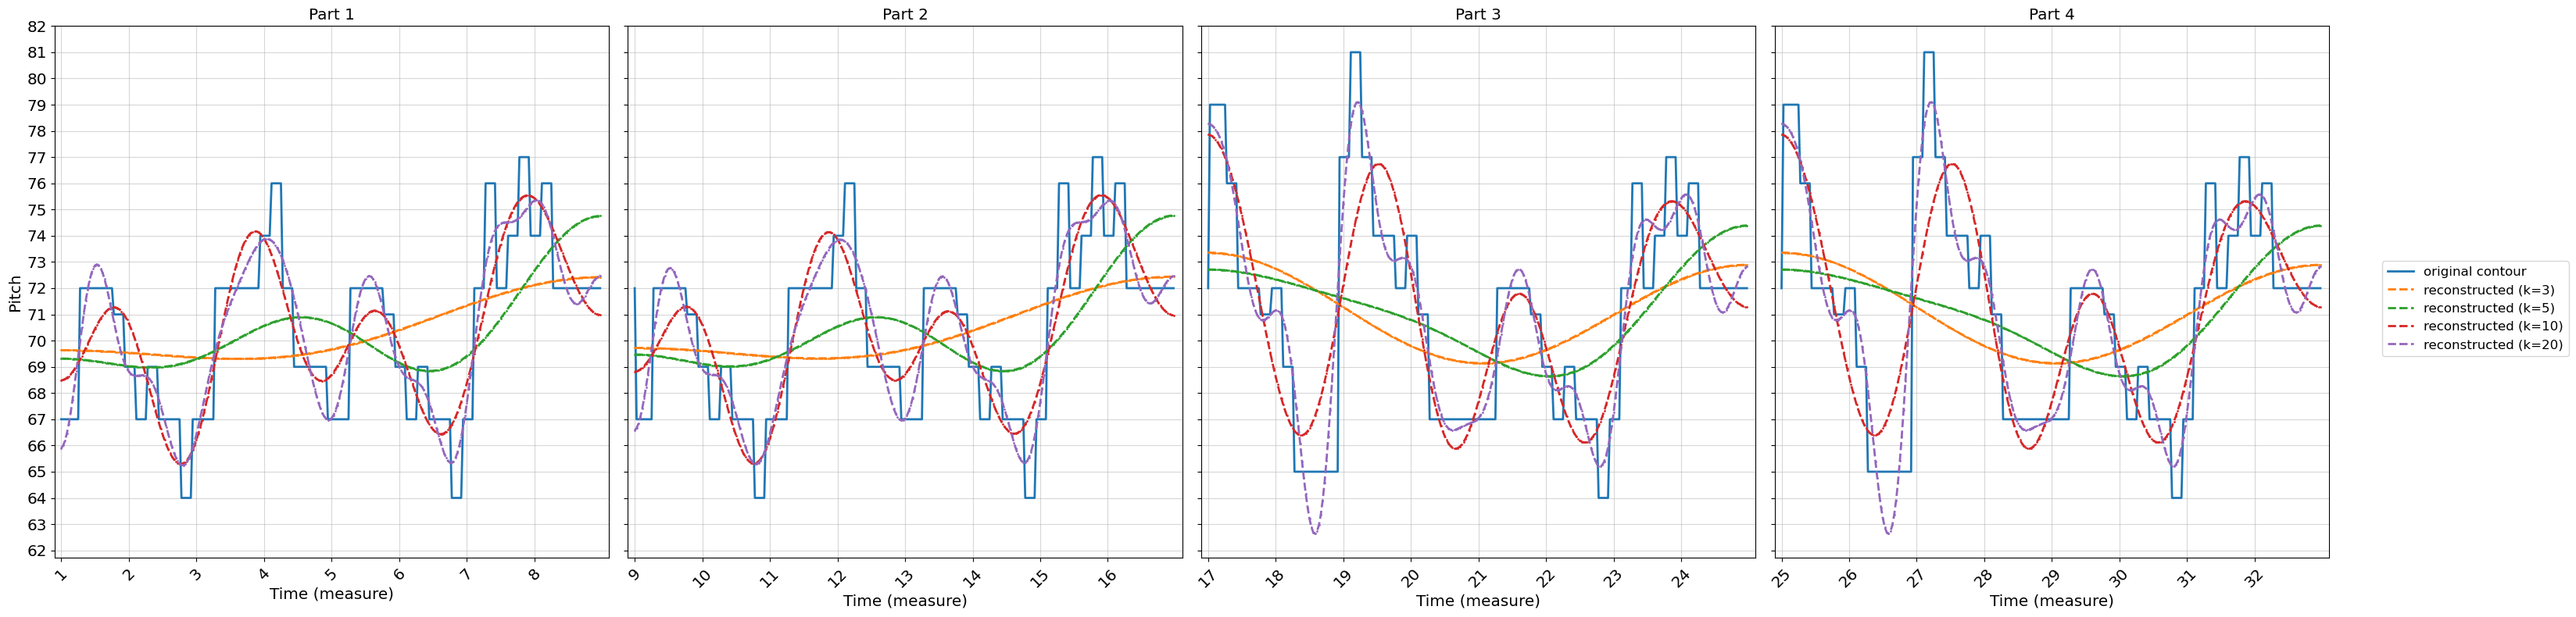

Tune n°: 358 
Parts: 4 
Title: Go to the Devil and shake yourself


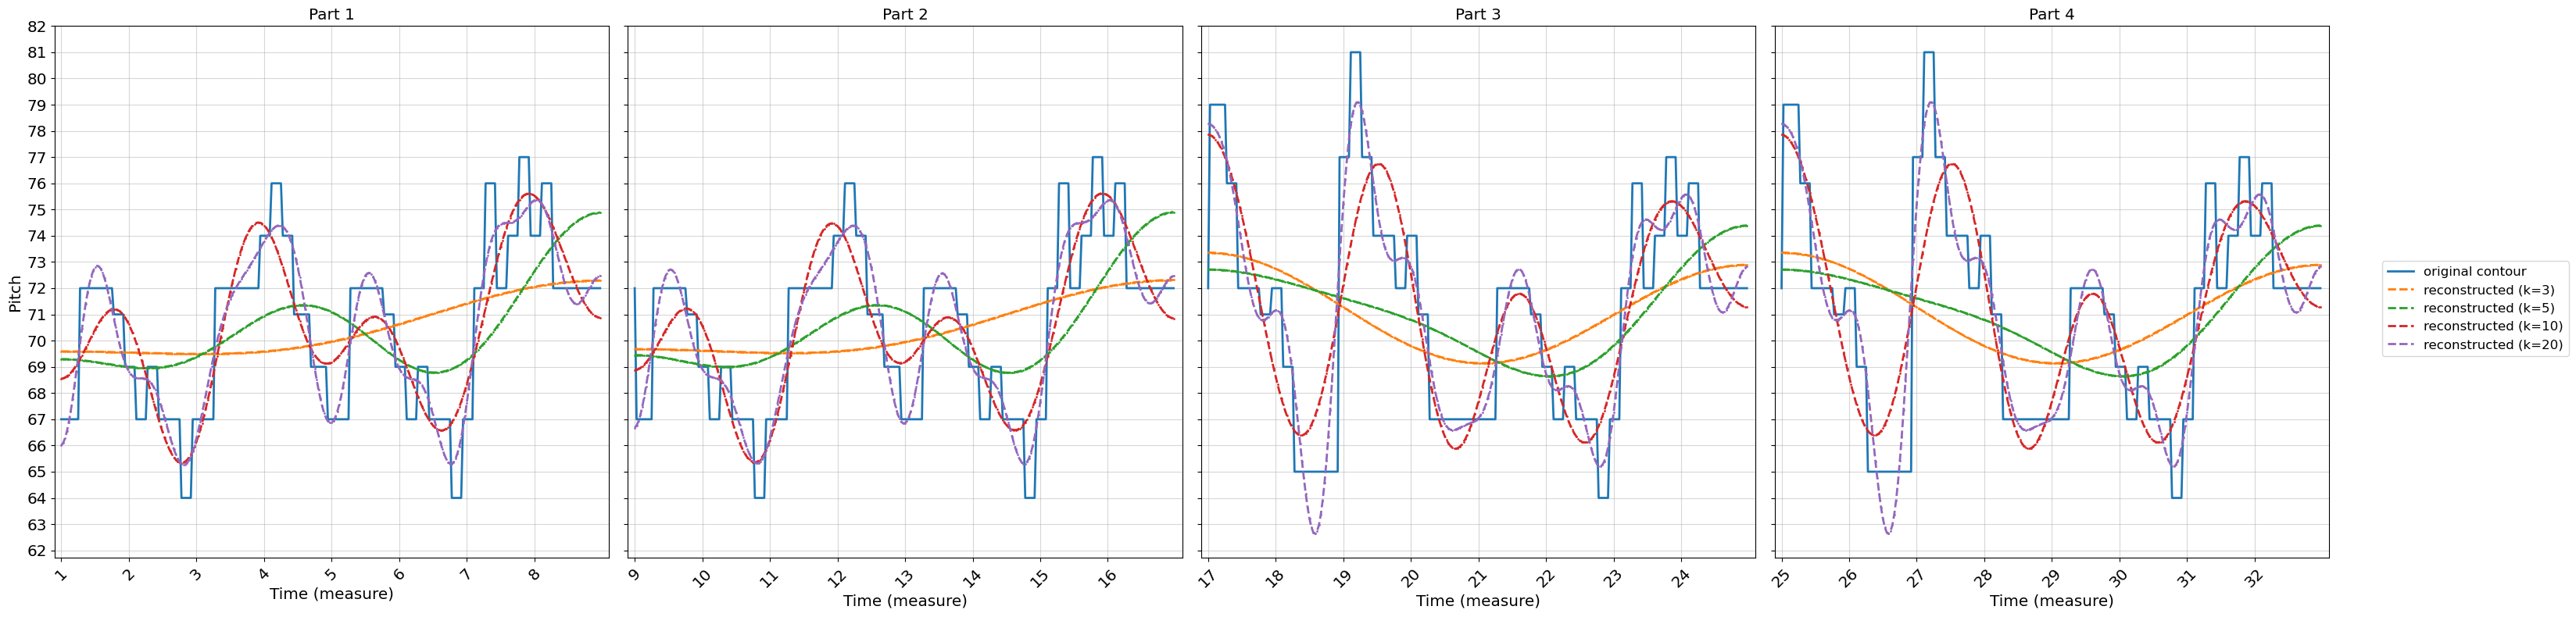

In [8]:
resolutions = [3, 5, 10, 20]
for idx_tune in idx_tunes:
    TimePitchTune = df.TimePitchTune[idx_tune]
    part_samples = int(6*8*Fs)
    num_parts = int(len(TimePitchTune)/part_samples)
    print("Tune n°:", idx_tune+1, "\nParts:", num_parts,"\nTitle:", df.title[idx_tune])

    # Create a figure with subplots arranged horizontally (1 row, num_parts columns) and share y-axis
    fig, axes = plt.subplots(1, num_parts, figsize=(30,8), sharey=True)
    first = True
    for part in range(num_parts):
        tt = np.arange(part*6*8, (part+1)*6*8, 1.0/Fs)
        init = part*part_samples
        end = (part+1)*part_samples

        ax = axes[part]  # Use the corresponding axis for this part

        # Plot the original contour
        if first:
            ax.plot(1+tt/6, TimePitchTune[init:end], '-', lw=2, ms=2, label='original contour')
        else:
            ax.plot(1+tt/6, TimePitchTune[init:end], '-', lw=2, ms=2)
        cs = dct(TimePitchTune[init:end], norm='ortho')

        copy_cs = cs.copy()
        # Plot the reconstructed signals for different values of k
        for k in resolutions:
            copy_cs[k:] = 0
            reconstructed = reconstruct_signal_cosine(copy_cs)
            if first:
                ax.plot(1+tt/6, reconstructed, '.--', lw=2, ms=2, label='reconstructed (k={})'.format(k))
            else:
                ax.plot(1+tt/6, reconstructed, '.--', lw=2, ms=2)
            copy_cs = cs.copy()

        # Set the title of each subplot
        ax.set_title(f"Part {part+1}")

        ax.set_xticks(np.arange(1+8*part, 8*(part+1)+1, 1))
        ax.set_xticklabels(np.arange(1+8*part, 8*(part+1)+1, 1), rotation=45)

        ax.set_xlabel("Time (measure)")
        if first:
            ax.set_ylabel("Pitch")
        ax.set_xlim((0.9+8*part, 1.1+8*(part+1)))

        ax.set_yticks(np.arange(62, 83, 1))
        ax.grid(alpha=.5)

        first = False

    # Add a single legend for all subplots (only once)
    fig.legend(loc='center right', bbox_to_anchor=(1.1, 0.5), fontsize=12)

    # Adjust spacing between subplots for better visualization
    plt.tight_layout()
    plt.show()


In [9]:
DCTs = {}
for idx_tune in df.index:
    TimePitchTune = df.TimePitchTune[idx_tune]
    # for all parts
    cs = dct(TimePitchTune, norm='ortho')
    DCTs[idx_tune] = cs

from scipy.spatial.distance import cosine 

def calculate_cosine_distance(cs1, cs2, res=20, transposition_invariant=False):
    if transposition_invariant:
        # Exclude the first coefficient (DC component) for transposition invariance
        cs1 = cs1[1:res]
        cs2 = cs2[1:res]
    else:
        cs1 = cs1[:res]
        cs2 = cs2[:res]
    return cosine(cs1, cs2)

resolutions = [3, 5, 10, 20]

reference_cs = DCTs[idx_tunes[0]]

In [10]:
print_abc = False

In [11]:
# Transposition dependent 

# Initialize a dictionary to store the cosine distances for each resolution
cosine_distances = {res: {} for res in resolutions}

# Calculate cosine distances for all tunes and resolutions
for res in resolutions:
    for idx_tune in DCTs.keys():
        if idx_tune == idx_tunes[0]:  # Skip the reference tune itself
            continue

        # Calculate cosine distance between the reference and the current tune
        distance = calculate_cosine_distance(reference_cs, DCTs[idx_tune], res, transposition_invariant=False)

        # Store the distance in the dictionary
        cosine_distances[res][idx_tune] = distance

# Find the 5 closest tunes for each resolution
closest_tunes = {}
for res in resolutions:
    # Sort the tunes by their cosine distances in ascending order
    sorted_distances = sorted(cosine_distances[res].items(), key=lambda x: x[1])

    # Take the first 5 tunes as the closest ones
    closest_tunes[res] = sorted_distances[:5]

# Print the closest tunes for each resolution
for res, tunes in closest_tunes.items():
    if print_abc:
        abcstr = 'X:'+str(idx_tunes[0]+1)+'\nM:'+df.time_signature[idx_tunes[0]]+'\nK:'+df.key[idx_tunes[0]]+'\n'+"".join(df.abcdata[idx_tunes[0]].split())
        print(abcstr)
    print("-"*80)
    print(f"Closest tunes to tune {idx_tunes[0]+1}:")
    for tune, distance in tunes:
        if print_abc:
            print(f"Tune {tune+1} - Cosine Distance: {distance}")
            abcstr = 'X:'+str(tune+1)+'\nM:'+df.time_signature[tune]+'\nK:'+df.key[tune]+'\n'+"".join(df.abcdata[tune].split())
            print(abcstr)
            print()
        else:
            print(f"Tune {tune+1} - Cosine Distance: {distance}")

--------------------------------------------------------------------------------
Closest tunes to tune 16:
Tune 358 - Cosine Distance: 2.603261142208879e-07
Tune 188 - Cosine Distance: 1.747803440310669e-06
Tune 102 - Cosine Distance: 1.7870279596099437e-06
Tune 225 - Cosine Distance: 1.883572119054655e-06
Tune 164 - Cosine Distance: 2.9017491399718764e-06
--------------------------------------------------------------------------------
Closest tunes to tune 16:
Tune 358 - Cosine Distance: 2.8806198004716066e-07
Tune 102 - Cosine Distance: 1.8377281578718652e-06
Tune 164 - Cosine Distance: 4.291030754388636e-06
Tune 22 - Cosine Distance: 4.9270143976931635e-06
Tune 188 - Cosine Distance: 5.062970306890513e-06
--------------------------------------------------------------------------------
Closest tunes to tune 16:
Tune 358 - Cosine Distance: 1.3180818841940223e-06
Tune 180 - Cosine Distance: 5.652073755579856e-05
Tune 52 - Cosine Distance: 8.307715225175372e-05
Tune 170 - Cosine Distanc

In [12]:
# Transposition invariant

# Initialize a dictionary to store the cosine distances for each resolution
cosine_distances = {res: {} for res in resolutions}

# Calculate cosine distances for all tunes and resolutions
for res in resolutions:
    for idx_tune in DCTs.keys():
        if idx_tune == idx_tunes[0]:  # Skip the reference tune itself
            continue

        # Calculate cosine distance between the reference and the current tune
        distance = calculate_cosine_distance(reference_cs, DCTs[idx_tune], res, transposition_invariant=True)

        # Store the distance in the dictionary
        cosine_distances[res][idx_tune] = distance

# Find the 5 closest tunes for each resolution
closest_tunes = {}
for res in resolutions:
    # Sort the tunes by their cosine distances in ascending order
    sorted_distances = sorted(cosine_distances[res].items(), key=lambda x: x[1])

    # Take the first 5 tunes as the closest ones
    closest_tunes[res] = sorted_distances[:5]

# Print the closest tunes for each resolution
for res, tunes in closest_tunes.items():
    if print_abc:
        abcstr = 'X:'+str(idx_tunes[0]+1)+'\nM:'+df.time_signature[idx_tunes[0]]+'\nK:'+df.key[idx_tunes[0]]+'\n'+"".join(df.abcdata[idx_tunes[0]].split())
        print(abcstr)
    print("-"*80)
    print(f"Closest tunes to tune {idx_tunes[0]+1} for resolution {res}:")
    for tune, distance in tunes:
        if print_abc:
            print(f"Tune {tune+1} - Cosine Distance: {distance}")
            abcstr = 'X:'+str(tune+1)+'\nM:'+df.time_signature[tune]+'\nK:'+df.key[tune]+'\n'+"".join(df.abcdata[tune].split())
            print(abcstr)
            print()
        else:
            print(f"Tune {tune+1} - Cosine Distance: {distance}")

--------------------------------------------------------------------------------
Closest tunes to tune 16 for resolution 3:
Tune 26 - Cosine Distance: 2.609252277352425e-06
Tune 294 - Cosine Distance: 5.948624903551192e-06
Tune 329 - Cosine Distance: 6.867503704066635e-05
Tune 52 - Cosine Distance: 0.00012576055590585167
Tune 228 - Cosine Distance: 0.00013236772937652574
--------------------------------------------------------------------------------
Closest tunes to tune 16 for resolution 5:
Tune 358 - Cosine Distance: 0.0018883353626515387
Tune 171 - Cosine Distance: 0.0056188243579765595
Tune 329 - Cosine Distance: 0.009173895791743658
Tune 189 - Cosine Distance: 0.014217806167959535
Tune 70 - Cosine Distance: 0.01514158090630302
--------------------------------------------------------------------------------
Closest tunes to tune 16 for resolution 10:
Tune 358 - Cosine Distance: 0.003575206169955658
Tune 171 - Cosine Distance: 0.019535443694404964
Tune 52 - Cosine Distance: 0.03466